In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
import assd_func as af

In [2]:
#patient1 - Subject 9
contour_path1="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/9/rtstruct/rtss.dcm"
img_path1="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/9/ct"
contour1=pydicom.read_file(contour_path1)
contours1=af.read_structure(contour1)
slices1 = [pydicom.read_file(img_path1 + '/' + s) for s in os.listdir(img_path1)]
image1 = np.stack([s.pixel_array for s in slices1], axis=-1)
label1, colors1 = af.get_mask(contours1, slices1, image1)

In [3]:
#patient2 - Subject 3
contour_path2="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/3/rtstruct/rtss.dcm"
img_path2="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/3/ct"
#read img and contour
contour2=pydicom.read_file(contour_path2)
contours2= af.read_structure(contour2)
slices2 = [pydicom.read_file(img_path2 + '/' + s) for s in os.listdir(img_path2)]
image2 = np.stack([s.pixel_array for s in slices2], axis=-1)
label2, colors2 = af.get_mask(contours2, slices2, image2)

In [4]:
#patient2 - Subject 1
contour_path3="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/1/rtstruct/rtss.dcm"
img_path3="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/1/ct"
#read img and contour
contour3=pydicom.read_file(contour_path3)
contours3=af.read_structure(contour3)
slices3 = [pydicom.read_file(img_path3 + '/' + s) for s in os.listdir(img_path3)]
image3 = np.stack([s.pixel_array for s in slices3], axis=-1)
label3, colors3 = af.get_mask(contours3, slices3, image3)

## Patient 1 (Subject 9)

C:\Users\lykha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


(-0.5, 511.5, 511.5, -0.5)

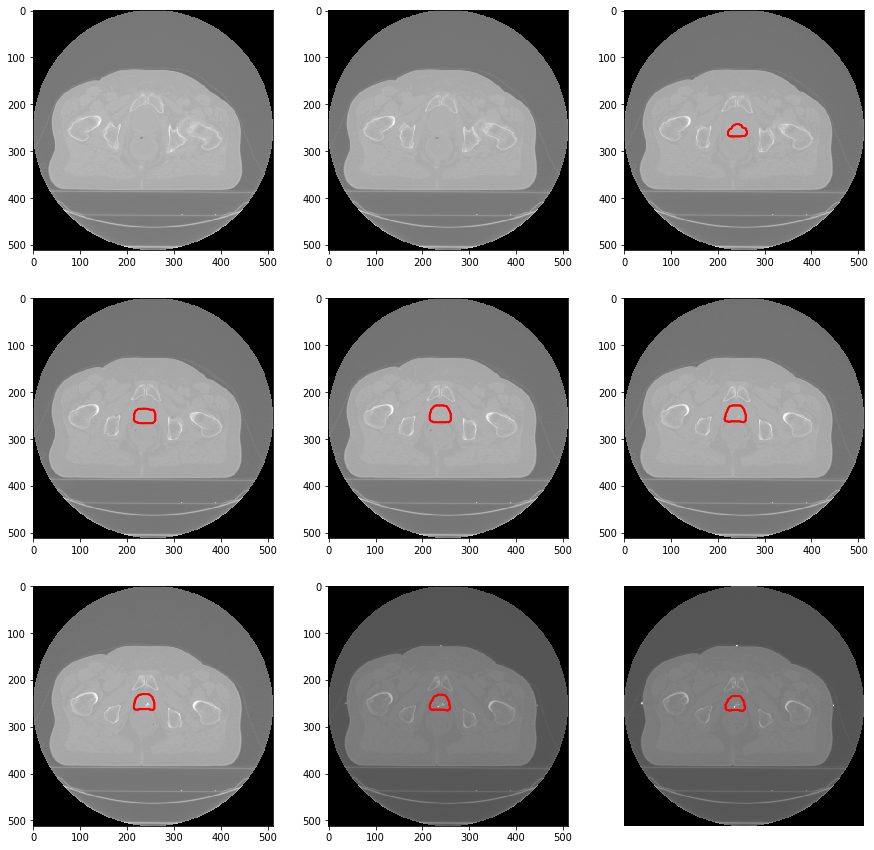

In [5]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image1[..., i + 15 ], cmap="gray")
    plt.contour(label1[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.axis('off')

## Patient 2 (Subject 3)

(-0.5, 511.5, 511.5, -0.5)

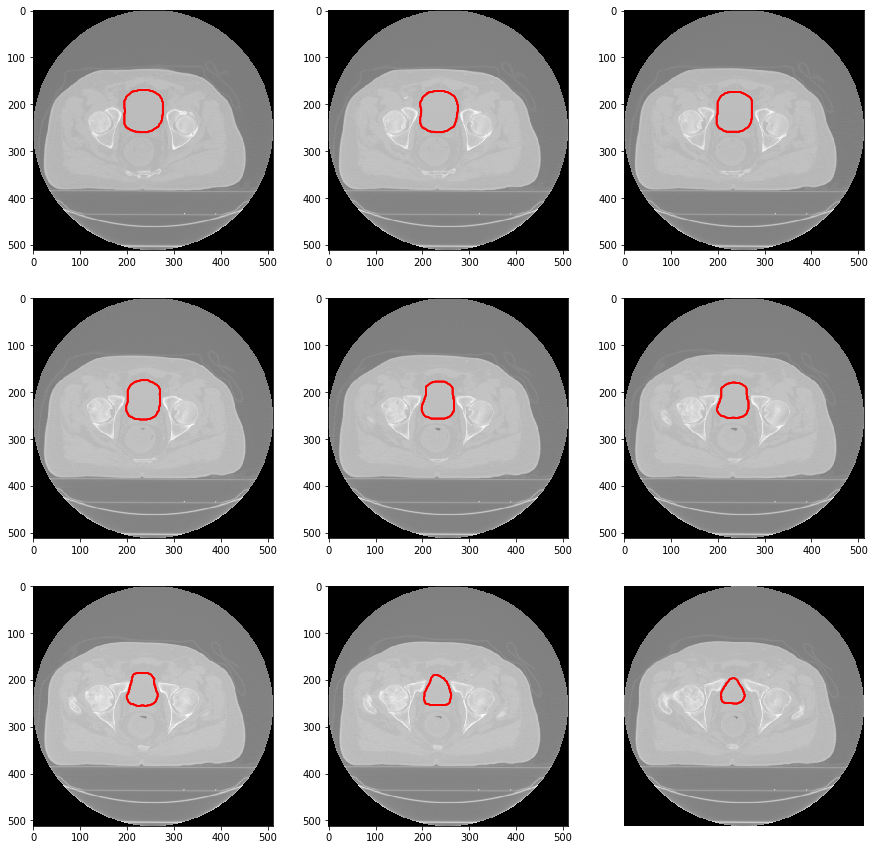

In [6]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image2[..., i + 180 ], cmap="gray")
    plt.contour(label2[..., i + 180 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.axis('off')

## Patient 3 (Subject 1)

(-0.5, 511.5, 511.5, -0.5)

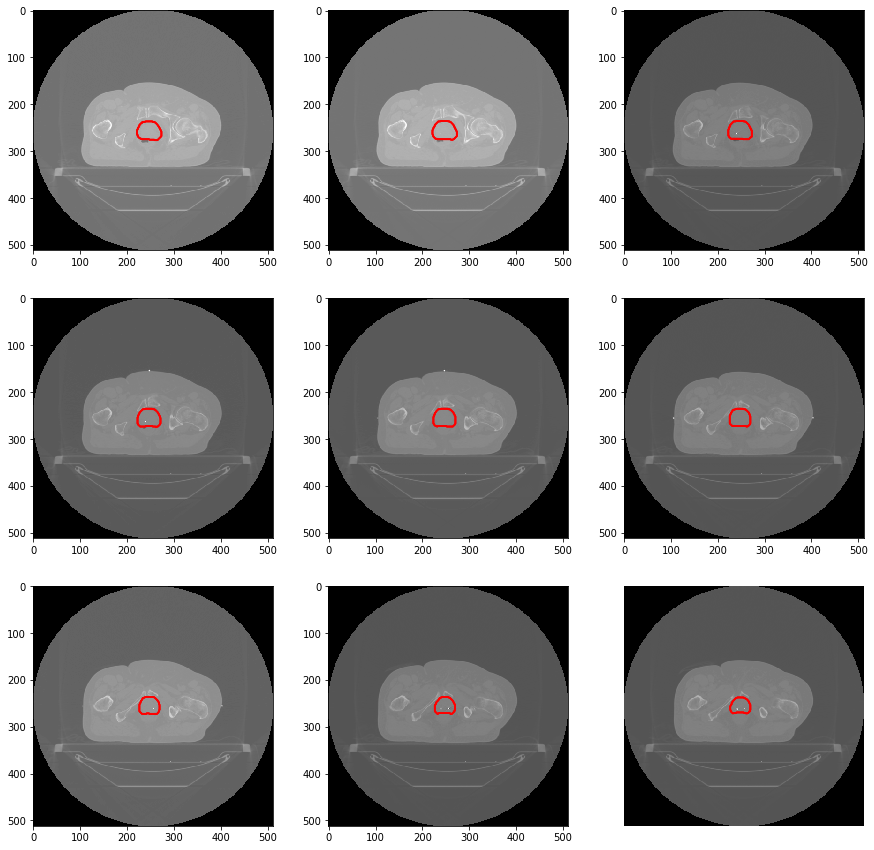

In [7]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image3[..., i + 15 ], cmap="gray")
    plt.contour(label3[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.axis('off')

In [8]:
# choose target img for patient1
target_img1 = image1[..., 19]
target_label1 = label1[..., 19]
mask1 = np.where(target_label1!=0,4,0)
surface1, interior1 = af.make_surface_contour(mask1)
surface_cord1 = np.argwhere(surface1 != 0).tolist()

In [9]:
# choose target img for patient2
target_img2 = image2[..., 185]
target_label2 = label2[..., 185]
mask2 = np.where(target_label2!=0,4,0)
surface2, interior2 = af.make_surface_contour(mask2)
surface_cord2 = np.argwhere(surface2 != 0).tolist()

In [10]:
# choose target img for patient3
target_img3 = image3[..., 16]
target_label3 = label3[..., 16]
mask3 = np.where(target_label3!=0,4,0)
surface3, interior3 = af.make_surface_contour(mask3)
surface_cord3 = np.argwhere(surface3 != 0).tolist()

# 3. Different paramenters on the same slice

## 3.1: Different k nearest neighbor for smoothing

(300.0, 190.0, 300.0, 190.0)

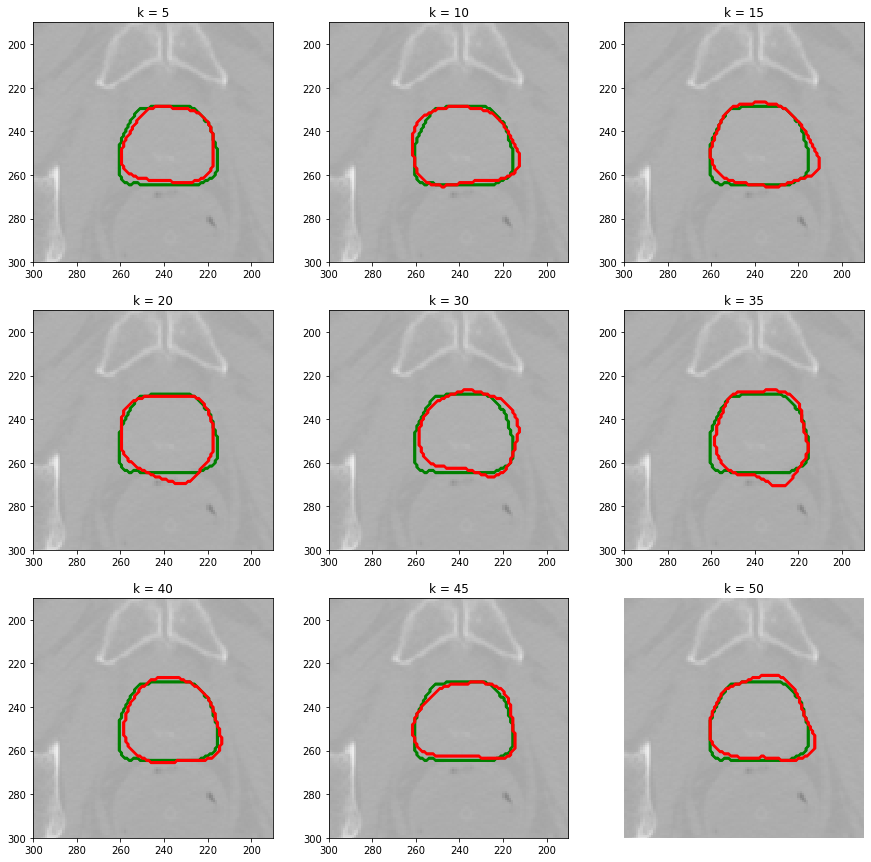

In [15]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
k = [5, 10, 15, 20, 30, 35, 40, 45, 50]
        
for i in range(len(k)):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, seed=123, k=i, w=6, smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    du1 = np.where(du1 < 0.5, 0, 4)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray")
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("k = " + str(k[i]))
plt.axis('off')

We find k nearest neighbors to smooth out the gradient for the purpose of smoothing the contour while processing the ASSD alogorithm. k = 45 seems to be a good parameter in this plot since it doesn't drastically smoothing out the contour and create a very desirable shape for a DU. Therefore, we pick k = 15 for our next step.

## 3.2 Different c for SD

(300.0, 190.0, 300.0, 190.0)

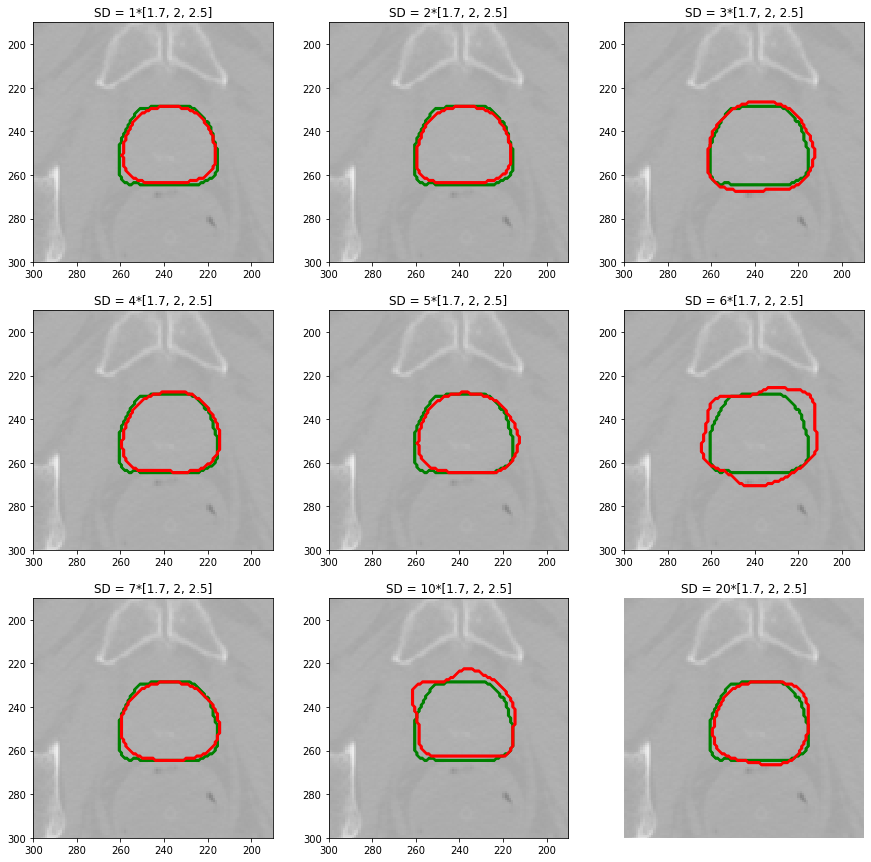

In [28]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
c = [1, 2, 3, 4, 5, 6, 7, 10, 20]
        
for i in range(len(c)):
    SD=[c[i]*1.7, c[i]*2, c[i]*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, seed=123, k=45, w=6, smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    du1 = np.where(du1 < 0.5, 0, 4)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray")
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("SD = " + str(c[i]) + "*[1.7, 2, 2.5]")
plt.axis('off')

SD helps in create the variations (or noise) from the original contour. After a a few experimentation, we find that 3, 4 and 5 seems to be good c to multiply with the SD since the contour there starts to have some uncertainties and not too much variation that distorts the original shape as in the SD after it. We may need to do a few combinations to find out the best ones to pick for c. 

## 3.3: Different R/w for Truncated Gaussian function 

(300.0, 190.0, 300.0, 190.0)

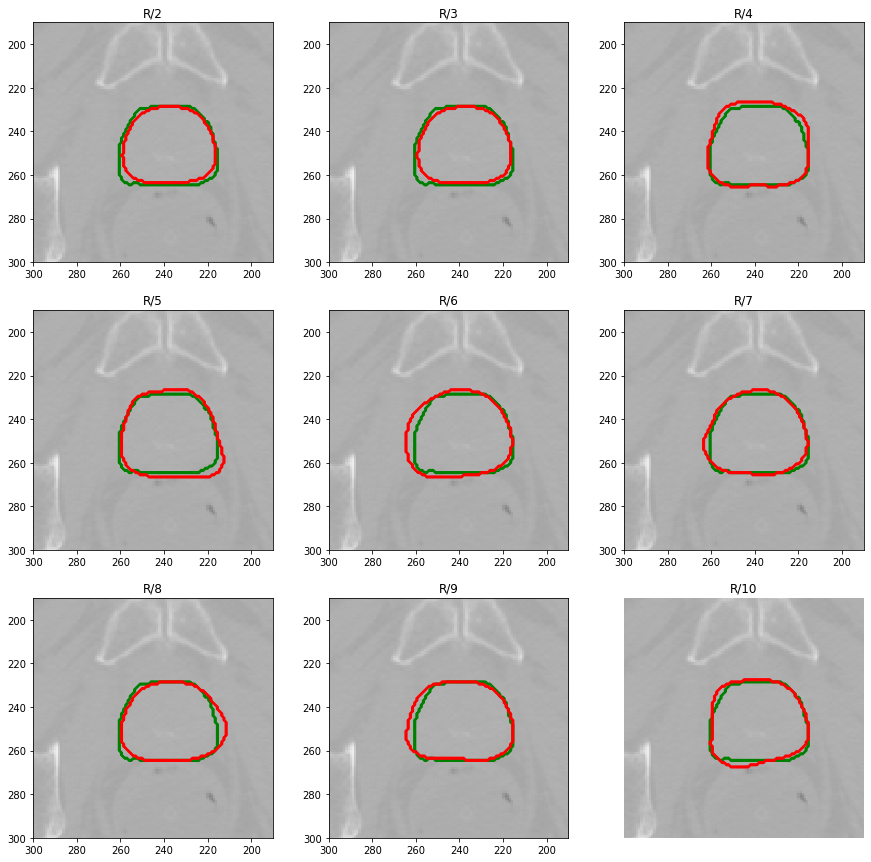

In [25]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
w = [2, 3, 4, 5, 6, 7, 8, 9, 10]
        
for i in range(len(w)):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, seed=123,k=45, w=w[i], smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    du1 = np.where(du1 < 0.5, 0, 4)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("R/" + str(w[i]))
plt.axis('off')

R/w is used in the Truncated Gaussian in order to move to voxel inward and outward in groups so that the final coutour looks more naaturally as it is drawn by human (not machine). Starting from w =4, the coutouring seems to be good parameters since they create some uncertainties and not too much viration that distorts the original shape. It seems like a ideal bad countouring that a clinician may draw in real life. We may need to do a few combination of these parameters to see which one will result in the most consistant DU contour accross many iterations. 

## 3.4: Ismax=True or False

After many experimentations, eventually, we resulted in a set of parameters that create the most desirable DU contouring. The set of parameters is:

-*SD = 5x[1.7, 2, 2.5] for variation in the contour*

-*k nearest neighbors = 45 fro smoothing of the contour*

-*R/6 in the truncated gaussian function*

In the truncated function, there is an option where we can choose to find max or min of gradct for i0. In the ASSD function, we put an option of ismax=True or False to account for that parameter.

(300.0, 190.0, 300.0, 190.0)

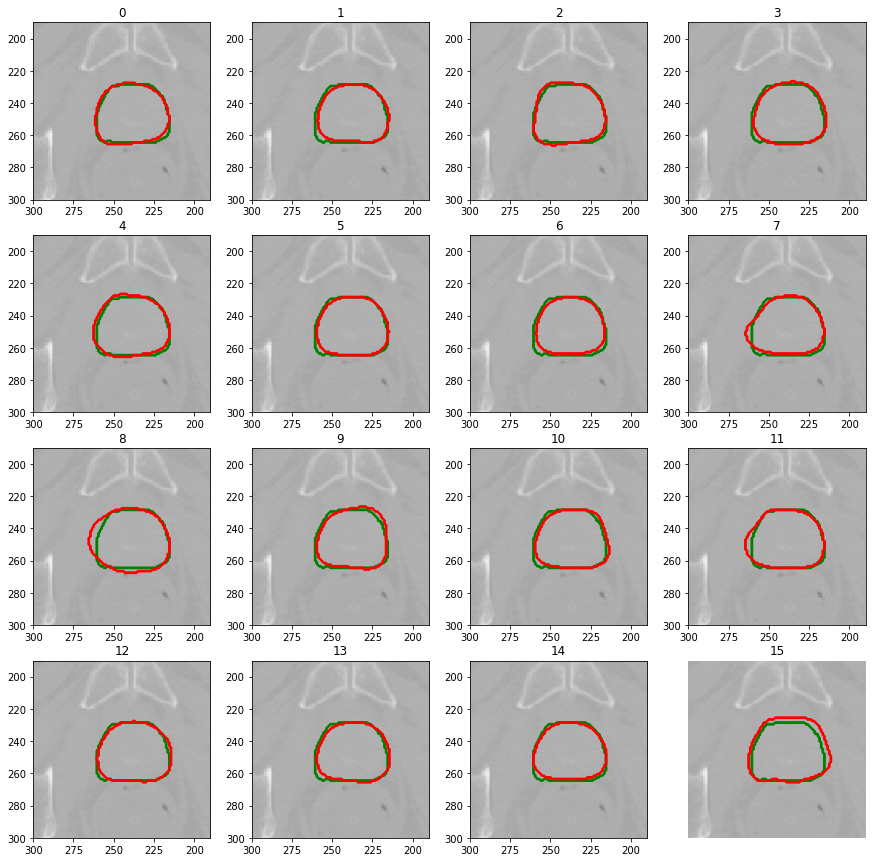

In [18]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))

for i in range(16):
    c = 4
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, seed=123, k=45, w=5, smooth=True, blur=True, ismax=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    du1 = np.where(du1 < 0.5, 0, 4)
    plt.subplot(4, 4, i + 1)
    plt.imshow(target_img1, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title(str(i))
plt.axis('off')

(300.0, 190.0, 300.0, 190.0)

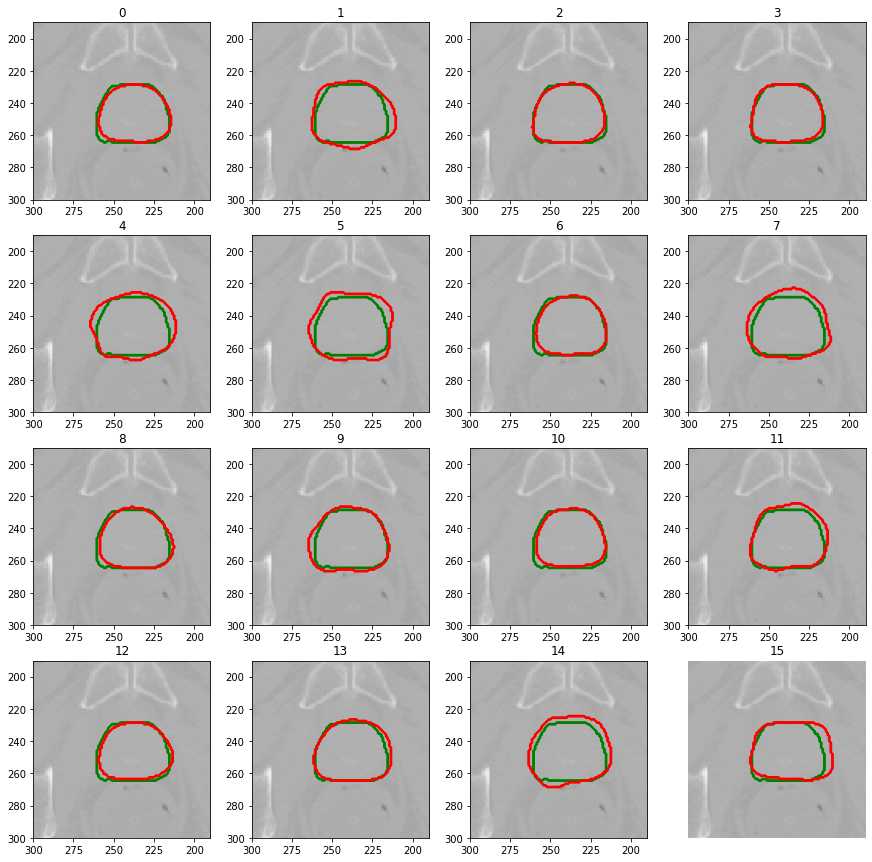

In [19]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))

for i in range(16):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, seed=123,k=45, w=5, smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    du1 = np.where(du1 < 0.5, 0, 4)
    plt.subplot(4, 4, i + 1)
    plt.imshow(target_img1, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title(str(i))
plt.axis('off')

With experimenting on ismax=True, we can see that there is not much of a difference between ismax=True and ismax=False. Although, some of the shape from ismax=True seems to vary much more in some images than ismax=False. Therefore, ismax=False was chosen for our set. 

## 3.5: Different iterations of the same set of final paramenters on the same slice on other 2 patients

Eventually, our final set of parameters is:

-*SD = 5x[1.7, 2, 2.5] for variation in the contour*

-*k nearest neighbors = 45 fro smoothing of the contour*

-*R/6 in the truncated gaussian function*

-*ismax=False*

We can now this set to verify the consistency of the contouring through runnng on different iterations for other two patients. 
    

(300.0, 170.0, 300.0, 170.0)

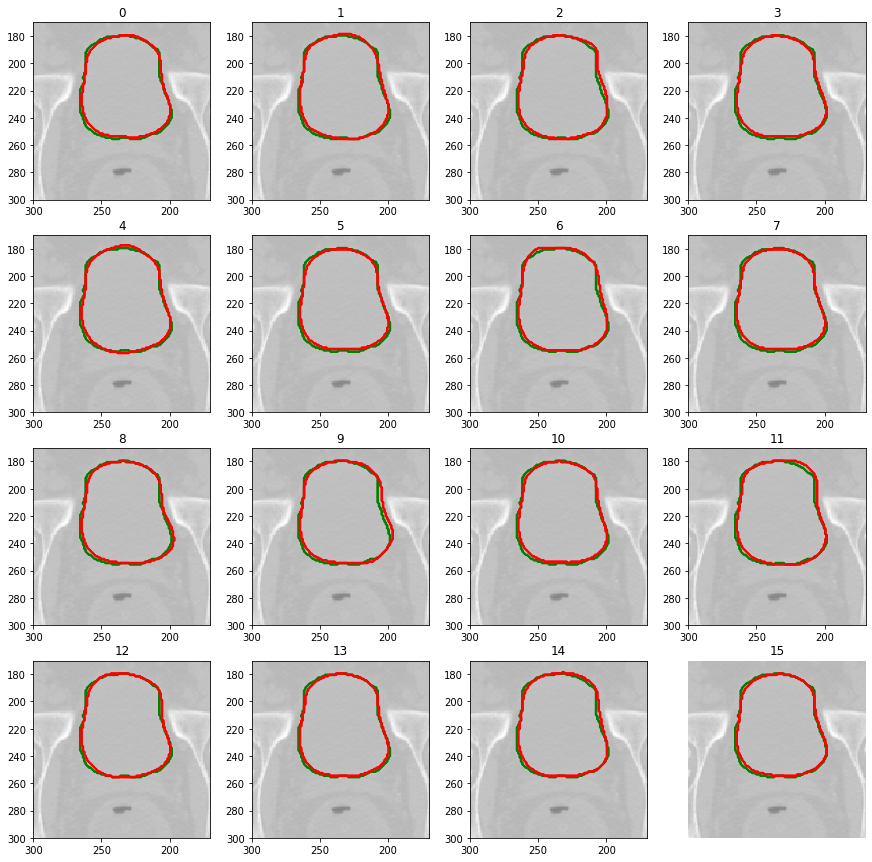

In [20]:
#patient2
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))

for i in range(16):
    c = 4
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask2, t, L  = af.assd(target_img2, target_label2, voxelsize, a, SD, circles=3, seed=123,k=45, w=5, smooth=True, blur=True, ismax=True)
    du2 = af.plotting_assd(dx, dy, mask2, target_img2, quiver=False, plot=False)
    du2 = np.where(du2 < 0.5, 0, 4)
    plt.subplot(4, 4, i + 1)
    plt.imshow(target_img2, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 170)
    plt.ylim(300, 170)
    plt.title(str(i))
plt.axis('off')

(300.0, 190.0, 300.0, 190.0)

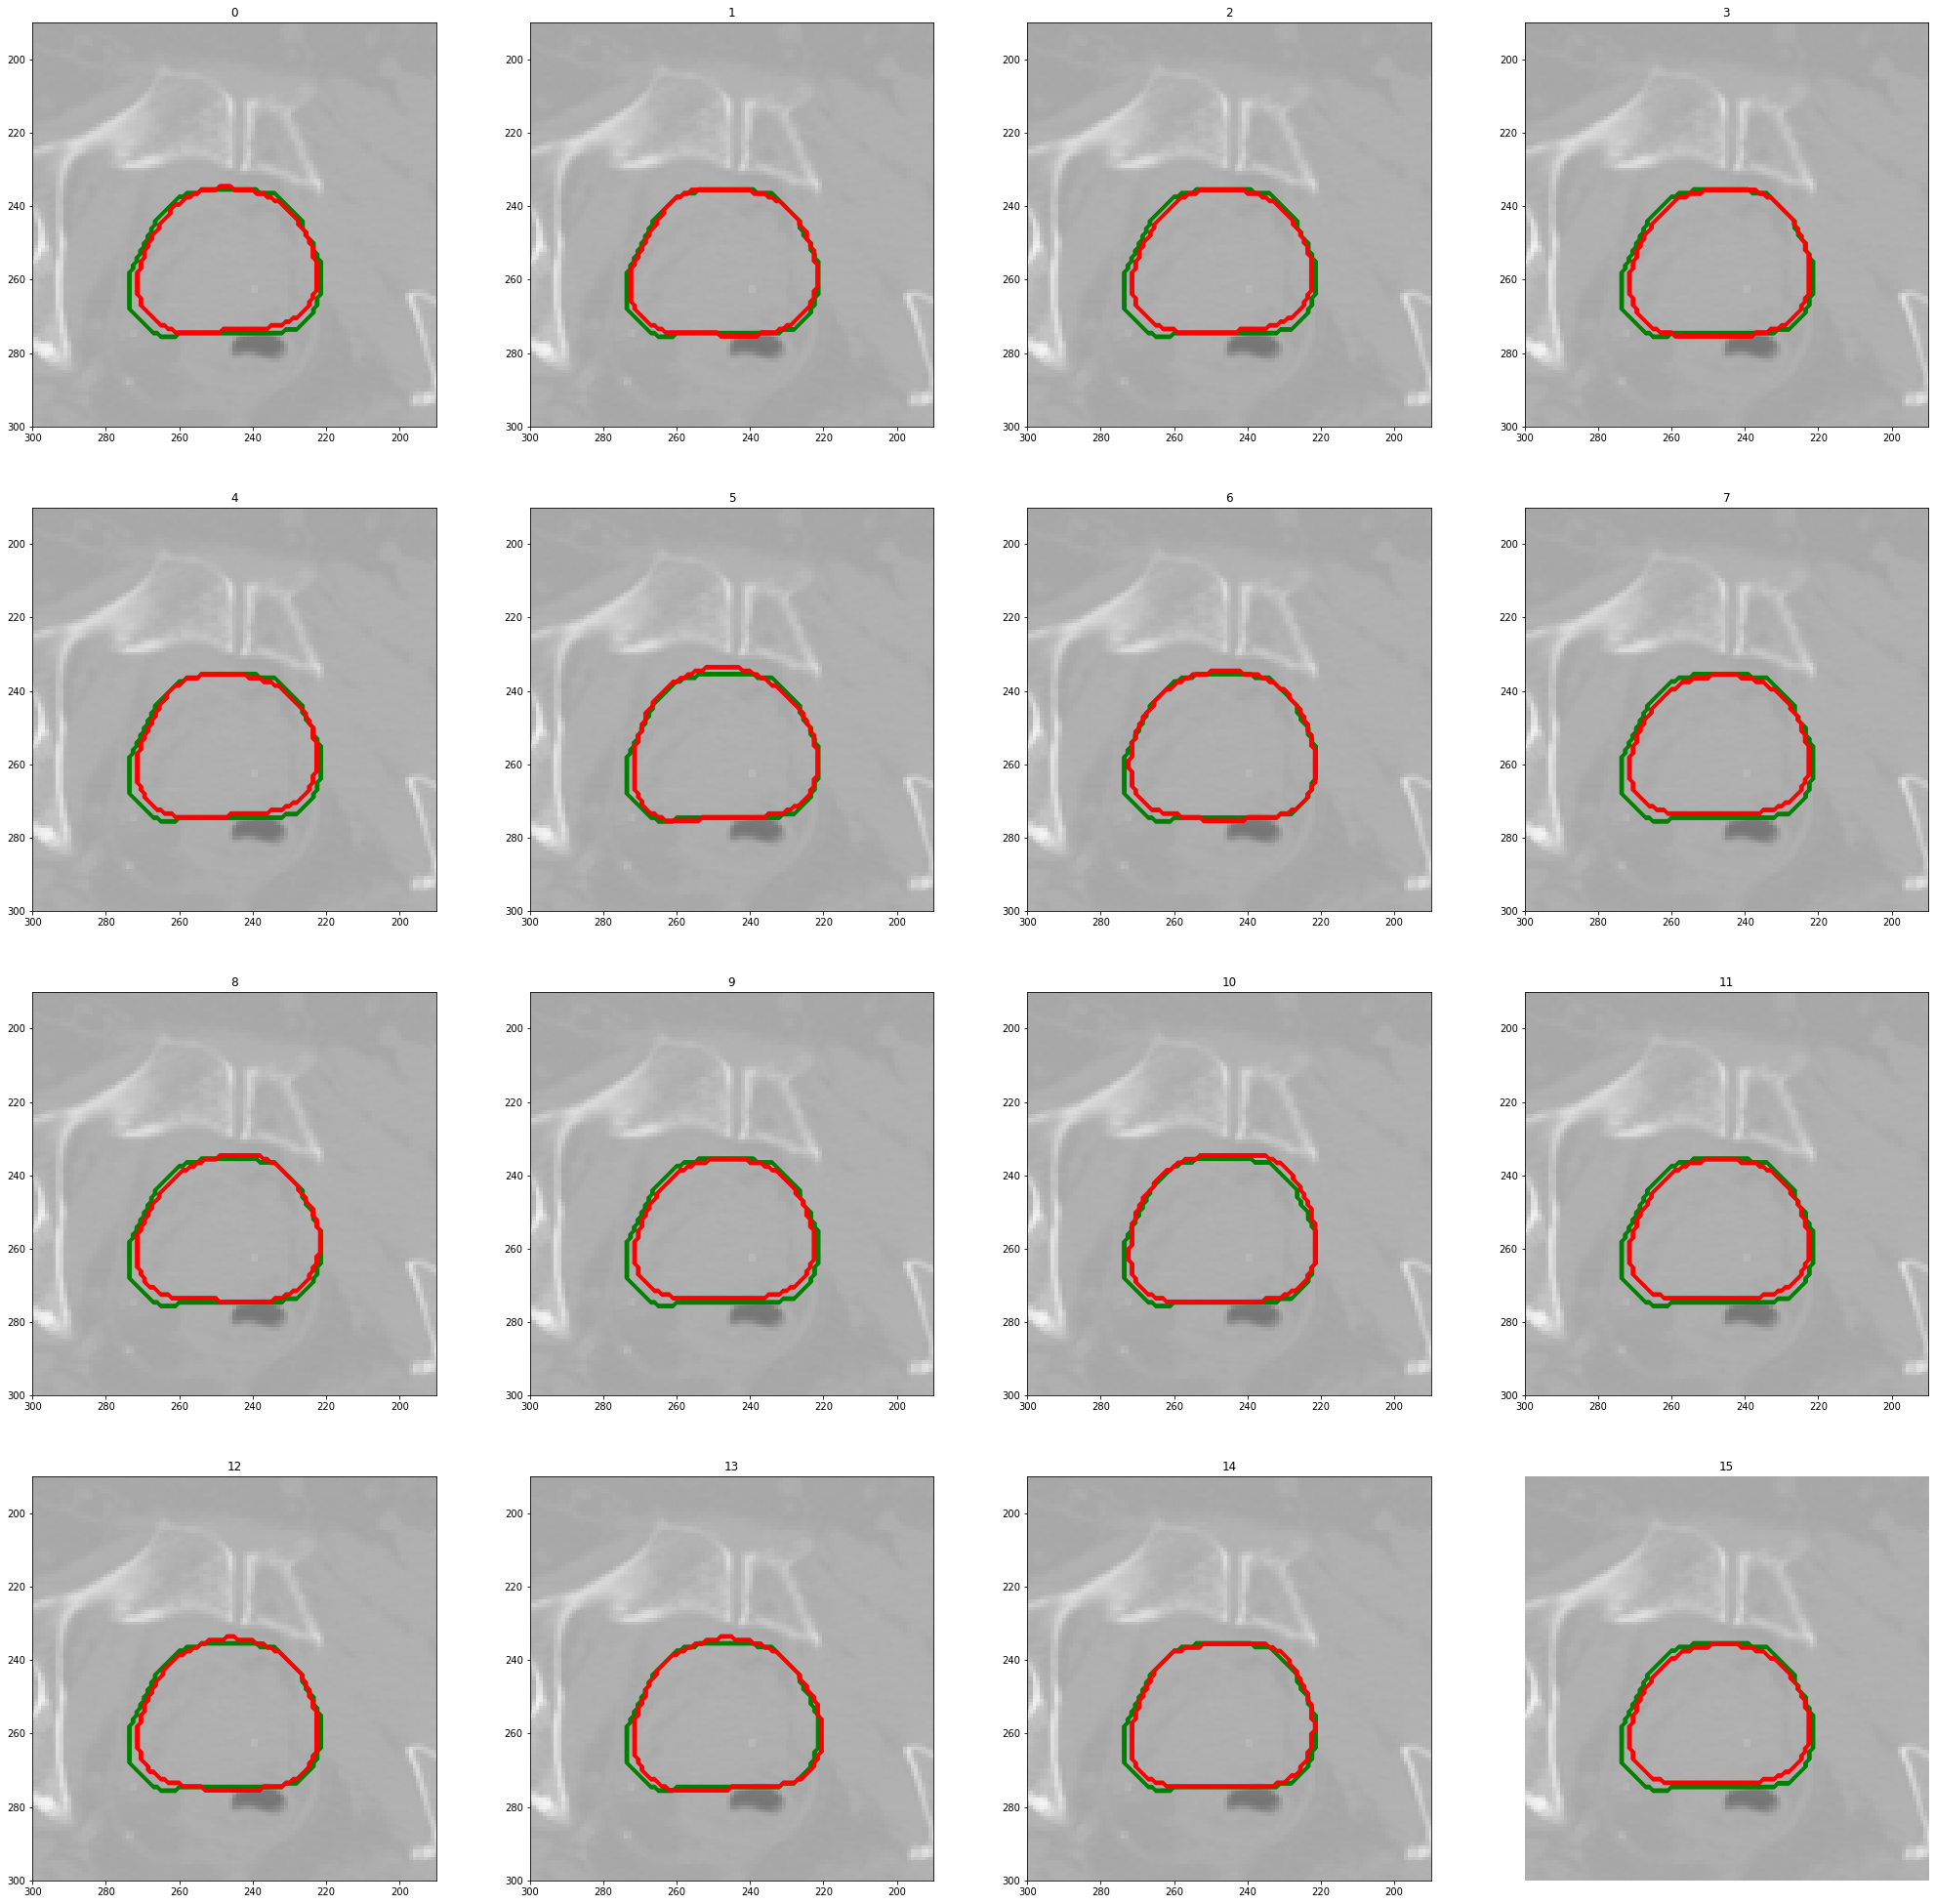

In [21]:
#patient3
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(35, 35))

for i in range(16):
    c = 4
    SD=[c*3.7, c*2, c*2.5]
    dx, dy, mask3, t, L  = af.assd(target_img3, target_label3, voxelsize, a, SD, circles=3, seed=123,k=45, w=5, smooth=True, blur=True, ismax=True)
    du3 = af.plotting_assd(dx, dy, mask3, target_img3, quiver=False, plot=False)
    du3 = np.where(du3 < 0.5, 0, 4)
    plt.subplot(4, 4, i + 1)
    plt.imshow(target_img3, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask3, colors="green")
    plt.contour(du3, colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title(str(i))
plt.axis('off')

In this plot, we show different iterations of the chosen set of paramters on the the same slice from 2 different patients. We can see that the DU contouring results seem very consistent throughout all 16 iterations. Therefore, this set of parameters are chosen as the standard set to be applied on other use use cases in next sections.